In [782]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [783]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [784]:
df = pd.read_csv('train.csv')

In [785]:
#Antes de mudar formatos
# SEATS __________________________________________________
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Substituir os valores nulos na coluna 'seats' por 5
df['seats'].fillna(5, inplace=True)

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

# FUEL TYPE __________________________________________________
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print()
print(valores_unicos_fuel_type)

# KMS __________________________________________________
def kms_driven_convertor(X):
    if isinstance(X, str):
        X = X.split()
        X = X[0]
        if X.count(",") == 1:
            X = float(X.replace(",", ".")) * 1000
        else:
            index = X.find(",")
            X = float(X.replace(",", "", 1).replace(",", ".")) * 1000
    return X

df["kms_driven"] = df["kms_driven"].apply(kms_driven_convertor)
# MAX POWER 
# #convert to bhp__________________________________________________

df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'] = df['max_power'].apply(lambda x: float("".join(re.findall('.\d+', str(x)))) if pd.notna(x) else x)
df['max_power'] = df['max_power'].apply(lambda x: float(str(x)[:-3]) if pd.notna(x) and str(x)[-3:].lower() == 'bhp' else x)


# OWNER TYPE __________________________________________________
# Delet blank spaces in 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Check
unique_values = df['owner_type'].unique()
print()
print(unique_values)


# INSURANCE __________________________________________________
df.loc[df["insurance"] == "Third Party insurance","insurance"] = "Third Party"
df.loc[df["insurance"] == "1","insurance"] = "First"
df.loc[df["insurance"] == "2","insurance"] = "Second"
df.loc[df["insurance"] == "Not Available","insurance"] = np.nan
df["insurance"] = df["insurance"].fillna(df["insurance"].mode()[0])

#MILEAGE
#assign value to blank lines
df['mileage'] = df['mileage'].fillna(0)
df["mileage"] = df["mileage"].apply(lambda x: float(str(x).split()[0]) if isinstance(x, str) else x)

# Check for any remaining issues
for value in df['mileage']:
    if isinstance(value, str):
        print(f"Remaining issue with mileage: {value}")


Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:

['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [786]:
df["insurance"].unique()

array(['Third Party', 'Zero Dep', 'Comprehensive', 'First', 'Second'],
      dtype=object)

In [787]:
#FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13920, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13920, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [788]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [789]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [790]:

novo_valor = df['mileage'].mean()
df['mileage'] = df['mileage'].fillna(novo_valor)

In [791]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [792]:
#Delet blanks or NAN 
# KMS __________________________________________________
df = df.dropna(subset=['kms_driven'])
# MAX POWER __________________________________________________
df = df.dropna(subset=['max_power'])
print(df['max_power'])
# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

77       102.0
147       63.0
258      110.0
273       68.0
310      170.0
         ...  
13307    140.0
13425     70.0
13480    102.0
13619    210.0
13633    198.5
Name: max_power, Length: 218, dtype: float64


In [793]:
#Create grupos

# groups max_power


limites = [0, 50, 100, 150, 200, 300, 600]  
rotulos = ['0-50bhp', '50-100 bhp', '100-150 bhp', '150-200 bhp', '200-300 bhp', '300-600 bhp']

df['max_power_group'] = pd.cut(df['max_power'], bins=limites, labels=rotulos, right=False)

# groups kms

limites = [0, 20000, 50000, 100000, 150000, 250000, float('inf')]  
rotulos = ['Até 20.000 km', '20.000 km a 50.000 km', '50.000 km a 100.000 km', '100.000 km a 150.000 km', 
           '150.000 km a 250.000 km', 'Acima de 250.000 km']

df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

df.loc[df['kms_driven'] == 250000, 'kms_group'] = 'Acima de 250.000 km'

# groups engine_capacity

limites = [0,1, 1000, 1200, 2000, 2500, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 1200 cc', 'até 2000 cc', 'até 2500 cc', 'mais de 2500 cc']

df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)


print(df)

                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi        Jun 2009   
13480  2015 Toyota Innova 2.5 GX (Diesel) 8 Seater BSIII        Nov 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
77              

In [794]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)



____________________FUEL TYPE_____________________
         Diesel: 0.43669259766405427
         Petrol: 0.20454389140788592
            LPG: 1.6127838567197355
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi        Jun 2009   
134

In [795]:
marcas = df['marca']
n_docs = len(df)
idf = {}

# Uniques
unique_marcas = marcas.drop_duplicates()

print("marca".center(50, "_"))

for marca in unique_marcas:
    k = sum(marca == val for val in marcas)  
    idf[marca] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{marca:>15}: {idf[marca]:>10}')

# Create new column
df['id_marca'] = df['marca'].map(idf)

print(df)

______________________marca_______________________
         Toyota: 0.880390096896767
        Hyundai: 0.8203921672214817
           Ford: 1.1076338783998294
        Citroen: 1.8346326063360918
       Mahindra: 1.4666558210414975
          Skoda: 1.4086638740638107
         Maruti: 0.6989700043360189
            BMW: 1.0330002601029253
          Honda: 0.8493558631567982
           Fiat: 2.010723865391773
           Tata: 1.135662602000073
      Chevrolet: 1.4086638740638107
     Mitsubishi: 1.8346326063360918
     Volkswagen: 1.8346326063360918
           Audi: 1.4086638740638107
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 C

In [796]:
# engine_capacity_group __________________________________________________

engine_capacity_groups = df['engine_capacity_group']

n_docs = len(df)

idf = {}

# Uniques
unique_engine_capacity_groups= engine_capacity_groups.drop_duplicates()

print("engine_capacity_group".center(50, "_"))

for engine_capacity_group in unique_engine_capacity_groups:
    k = sum(engine_capacity_group == val for val in engine_capacity_groups)  
    idf[engine_capacity_group] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{engine_capacity_group:>15}: {idf[engine_capacity_group]:>10}')

# Create new column
df['id_engine_capacity_group'] = df['engine_capacity_group'].map(idf)

print(df)

______________engine_capacity_group_______________
    até 2500 cc: 0.7802749440134992
    até 1200 cc: 1.0107238653917732
    até 2000 cc: 0.1687390608016592
mais de 2500 cc: 1.1656258253775162
    até 1000 cc: 1.8346326063360918
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425    

In [797]:
# kms_driven __________________________________________________

kms_groups = df['kms_group']

n_docs = len(df)

idf = {}

# Uniqes
unique_kms_groups = kms_groups.drop_duplicates()

print("kms_group".center(50, "_"))

for kms_group in unique_kms_groups:
    k = sum(kms_group == val for val in kms_groups)  
    idf[kms_group] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{kms_group:>15}: {idf[kms_group]:>10}')

# Create new column
df['id_kms_group'] = df['kms_group'].map(idf)

print(df)

____________________kms_group_____________________
100.000 km a 150.000 km: 0.45442136462448585
50.000 km a 100.000 km: 0.30743248727311173
20.000 km a 50.000 km: 1.1076338783998294
  Até 20.000 km: 1.709693869727792
150.000 km a 250.000 km: 1.0813049396774803
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitroni

In [798]:
# Max power __________________________________________________

max_power_groups = df['max_power_group']

n_docs = len(df)

idf = {}

# Uniques
unique_max_power_groups = max_power_groups.drop_duplicates()

print("max_power_group".center(50, "_"))

for max_power_group in unique_max_power_groups:
    k = sum(max_power_group == val for val in fuel_types) 
    idf[max_power_group] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{max_power_group:>15}: {idf[max_power_group]:>10}')

# Create new column
df['id_max_power_group'] = df['max_power_group'].map(idf)

print(df)

_________________max_power_group__________________
    100-150 bhp: 2.311753861055754
     50-100 bhp: 2.311753861055754
    150-200 bhp: 2.311753861055754
    200-300 bhp: 2.311753861055754
    300-600 bhp: 2.311753861055754
        0-50bhp: 2.311753861055754
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitroni

In [799]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

   Second Owner: 0.4086638740638107
    First Owner: 0.4141267697653129
    Fifth Owner: 1.4086638740638107
   Fourth Owner: 1.1978105087489175
    Third Owner: 0.8346326063360918
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi    

In [800]:
# Obtendo os valores únicos da coluna 'body_type'
valores_unicos_body_type = df['insurance'].unique()

# Exibindo os valores únicos
print(valores_unicos_body_type)

['Third Party' 'Comprehensive']


In [801]:
# Cálculo do IDF
insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance_val in unique_insurance:
    k = sum(insurance_val == val for val in insurance)
    idf[insurance_val] = np.log10(n_docs / (k + 1))  # +1 to avoid division by zero

# Visualizar os valores IDF
for insurance_val, value in idf.items():
    print(f'{insurance_val:>15}: {value:>10}')

# Substituir os valores na coluna 'insurance' pelos valores IDF
df['id_insurance'] = df['insurance'].map(idf)

# Visualizar o DataFrame atualizado
print(df)

    Third Party: 0.06871581236945988
  Comprehensive: 0.8066038827358484
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi        Jun 2009   
13480  2015 Toyota Innova 2.5 GX (Diesel) 8 Seater BSIII        Nov 2015   

       engine_

In [802]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

         Jaipur: 1.2325726150081295
         Mumbai: 0.7802749440134992
      Hyderabad: 0.8493558631567982
      Bangalore: 0.6683011845695669
      Ahmedabad: 1.2703611758975293
     Chandigarh: 1.5336026106721106
          Delhi: 1.0564813559524482
        Lucknow: 1.5336026106721106
           Pune: 0.9138138523837167
        Kolkata: 1.135662602000073
           Agra: 1.8346326063360918
        Gurgaon: 1.5336026106721106
        Chennai: 1.3575113516164294


In [803]:
# MODELO _____________________________________

modelos = df['modelo']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['modelo'].map(idf)

print(df)


                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi        Jun 2009   
13480  2015 Toyota Innova 2.5 GX (Diesel) 8 Seater BSIII        Nov 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
77              

In [804]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

            MUV: 0.9500260250381614
      Hatchback: 0.6396560031200369
          Sedan: 0.2113833159381914
            SUV: 1.2325726150081295
       Minivans: 2.010723865391773
                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi     

In [805]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)


                                               full_name registered_year  \
77     2007 Toyota Innova 2.5 G (Diesel) 8 Seater BS III            2007   
147                          2008 Hyundai Santro Xing XE            2008   
258                           2010 Hyundai Verna CRDi SX            2010   
273                     2009 Ford Fiesta 1.4 ZXi TDCi LE            2009   
320                       2021 Citroen C5 Aircross Shine        Jul 2021   
...                                                  ...             ...   
13258                                  2008 Tata Sumo CX            2008   
13260                            2006 Hyundai Verna CRDi        Feb 2007   
13307                   2014 Audi A4 2.0 TDI Multitronic        Dec 2015   
13425                            2009 Ford Ikon 1.3 CLXi        Jun 2009   
13480  2015 Toyota Innova 2.5 GX (Diesel) 8 Seater BSIII        Nov 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
77              

In [806]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_marca': float,
})

In [807]:
import pandas as pd

# Supondo que você já tenha seu DataFrame 'df' preenchido com os dados

# Exportar DataFrame para um arquivo CSV
df.to_csv('dados_completos.csv', index=False)

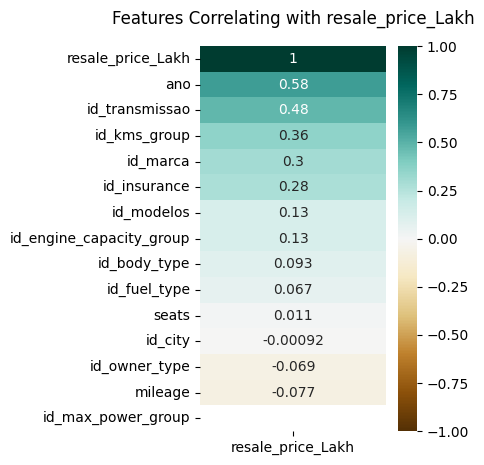

In [808]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_modelos','id_marca', 'mileage','ano','id_city','id_insurance','seats','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [809]:
#Export
#Not the target
colunas_selecionadas = ['id_body_type','id_marca','ano', 'mileage','id_max_power_group', 'id_transmissao', 'id_modelos','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Acenario2Coluna_0_20.csv', index=False)

In [810]:
#Export
#Not the target
colunas_selecionadas = ['id_transmissao','transmission_type','body_type','id_body_type','modelo','id_modelos','marca','id_categoria_marca','ano','max_power','max_power_group','id_max_power_group','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todascenario2_0_20.csv', index=False)

In [811]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'mileage': float,
    'id_fuel_type': float,
    'id_marca': float,
    'id_engine_capacity_group': float,
    'id_kms_group': float,
    'id_max_power_group': float,
    'id_owner_type': float,
    'id_insurance': float,
    'id_city': float,
    'id_modelos': float,
    'id_body_type': float,
    'id_transmissao': float,

})

In [812]:
#Export
#Not the target
colunas_selecionadas = ['mileage','id_transmissao','transmission_type','body_type','id_body_type','modelo','id_modelos','marca','id_marca','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','engine_capacity_group','id_engine_capacity_group','fuel_type','id_fuel_type','kms_driven','kms_group','id_kms_group','max_power','max_power_group','id_max_power_group','owner_type','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todascenario2.csv', index=False)

In [813]:
#Export
#Not the target
colunas_selecionadas = ['id_body_type','id_marca','ano','id_city','id_insurance','seats','id_transmissao','mileage','id_engine_capacity_group','id_fuel_type','id_kms_group','id_max_power_group','id_owner_type','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('LMSV5cenario2.csv', index=False)
   

In [814]:
#Export
#Not the target
colunas_selecionadas = ['id_categoria_marca','ano','mileage','id_transmissao','id_max_power_group','resale_price_Lakh']

if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('rafaCenario4.csv', index=False)

In [815]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)


Data type by column:
full_name                           object
registered_year                     object
engine_capacity                    float64
insurance                           object
transmission_type                   object
kms_driven                         float64
owner_type                          object
fuel_type                           object
max_power                          float64
seats                              float64
mileage                            float64
body_type                   string[python]
city                                object
resale_price_Lakh                  float64
ano                                float64
marca                       string[python]
modelo                      string[python]
max_power_group                   category
kms_group                         category
engine_capacity_group             category
id_fuel_type                       float64
id_marca                           float64
id_engine_capacity_group         

In [816]:
# Lista das colunas que você quer converter para string
cols_to_convert = ['max_power_group', 'kms_group', 'engine_capacity_group', 'marca']

# Convertendo as colunas para o tipo string
df[cols_to_convert] = df[cols_to_convert].astype(str)


In [817]:
# List of columns with matching IDs
cols_to_drop = [
    'full_name',
    'registered_year'
]

# Delete columns that have matching IDs
df = df.drop(columns=cols_to_drop)

In [818]:
print(df)

       engine_capacity      insurance transmission_type  kms_driven  \
77              2494.0    Third Party            Manual    120000.0   
147             1086.0    Third Party            Manual    100000.0   
258             1493.0    Third Party            Manual     70000.0   
273             1399.0    Third Party            Manual    100000.0   
320             1997.0  Comprehensive         Automatic     30465.0   
...                ...            ...               ...         ...   
13258           2179.0    Third Party            Manual    100000.0   
13260           1493.0  Comprehensive            Manual    149892.0   
13307           1968.0    Third Party         Automatic     67935.0   
13425           1299.0    Third Party            Manual     83106.0   
13480           2494.0    Third Party            Manual    125000.0   

         owner_type fuel_type  max_power  seats  mileage  body_type  ...  \
77     Second Owner    Diesel     102.00    8.0    12.80        MUV  ..

In [819]:
print(df.columns)

Index(['engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city', 'resale_price_Lakh', 'ano', 'marca', 'modelo',
       'max_power_group', 'kms_group', 'engine_capacity_group', 'id_fuel_type',
       'id_marca', 'id_engine_capacity_group', 'id_kms_group',
       'id_max_power_group', 'id_owner_type', 'id_insurance', 'id_city',
       'id_modelos', 'id_body_type', 'id_transmissao'],
      dtype='object')
